In [1]:
library(ggplot2)
library(readxl)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'readxl' was built under R version 3.6.3"

In [2]:
my_data <- read_excel("C:\\Users\\pro_v\\OneDrive\\Desktop\\Bellevue University Data Science\\DSC 640\\Week 1-2\\ex1-2\\obama-approval-ratings.xls")

In [3]:
str(my_data)

tibble [13 x 4] (S3: tbl_df/tbl/data.frame)
 $ Issue     : chr [1:13] "Race Relations" "Education" "Terrorism" "Energy Policy" ...
 $ Approve   : num [1:13] 52 49 48 47 44 43 41 41 40 38 ...
 $ Disapprove: num [1:13] 38 40 45 42 48 51 53 54 57 59 ...
 $ None      : num [1:13] 10 11 7 11 8 6 6 5 3 3 ...


In [4]:
my_data

Issue,Approve,Disapprove,None
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3
Economy,38,59,3


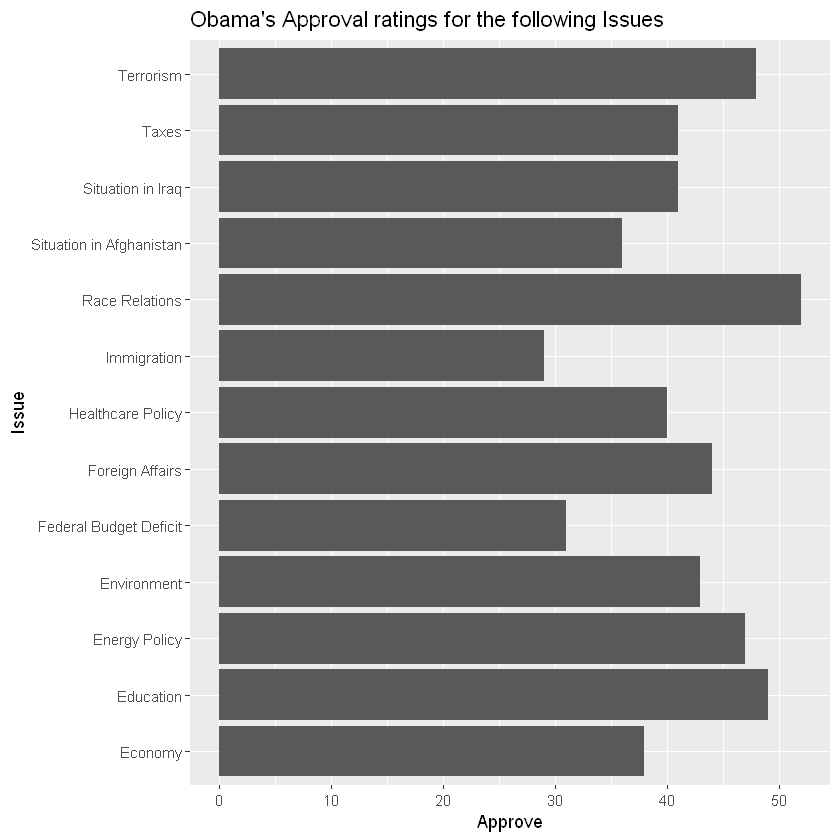

In [5]:
obamaplot<-ggplot(my_data, aes(x=Issue,y=Approve))+geom_col()+coord_flip()
print(obamaplot+ggtitle("Obama's Approval ratings for the following Issues"))

In [18]:
df1<-rbind(data.frame(Issue, "count"=Approve, "type"="Approve"),
          data.frame(Issue, "count"=Disapprove, "type"="Disapprove"))

ERROR: Error in match.names(clabs, names(xi)): names do not match previous names


In [ ]:
df1<-rbind(data.frame(my_data["Issue"], "count"=my_data["Approve"], "type"="Approve"),
          data.frame(my_data["Issue"], "count"=my_data["Disapprove"], "type"="Disapprove"))
ggplot(df2, aes(x=Issue, y=count, fill=type))+geom_bar(stat="identity")

In [41]:
str(my_data["Issue"])

tibble [13 x 1] (S3: tbl_df/tbl/data.frame)
 $ Issue: chr [1:13] "Race Relations" "Education" "Terrorism" "Energy Policy" ...


In [42]:
my_data["Issue"]

Issue
Race Relations
Education
Terrorism
Energy Policy
Foreign Affairs
Environment
Situation in Iraq
Taxes
Healthcare Policy
Economy


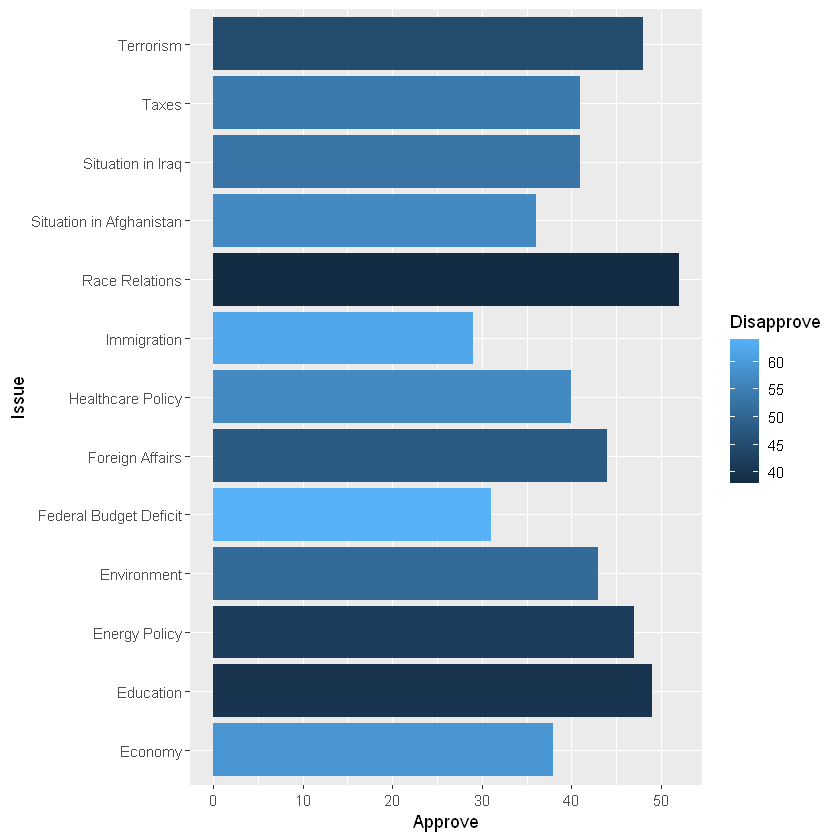

In [14]:
ggplot(my_data, aes(x=Issue, y=Approve, fill=Disapprove))+geom_col(position="stack")+coord_flip()

In [15]:
Issue<-my_data["Issue"]
Approve<-my_data["Approve"]
Disapprove<-my_data["Disapprove"]
None<-my_data["None"]
df<-data.frame(Issue,Approve,Disapprove,None)
df

Issue,Approve,Disapprove,None
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3
Economy,38,59,3


In [21]:
Approve<-c(51,49,48,47,44,43,41,41,40,38,36,31,29)
Disapprove<-c(38,40,45,42,48,51,53,54,57,59,57,64,62)
None<-c(10,11,7,11,8,6,6,5,3,3,7,5,9)
df<-data.frame(Issue,Approve,Disapprove,None)
df

Issue,Approve,Disapprove,None
Race Relations,51,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3
Economy,38,59,3


In [22]:
df2<-rbind(data.frame(Issue, "count" = Approve, "type"="Approve"),
          data.frame(Issue, "count"=Disapprove, "type"="Disapprove"))

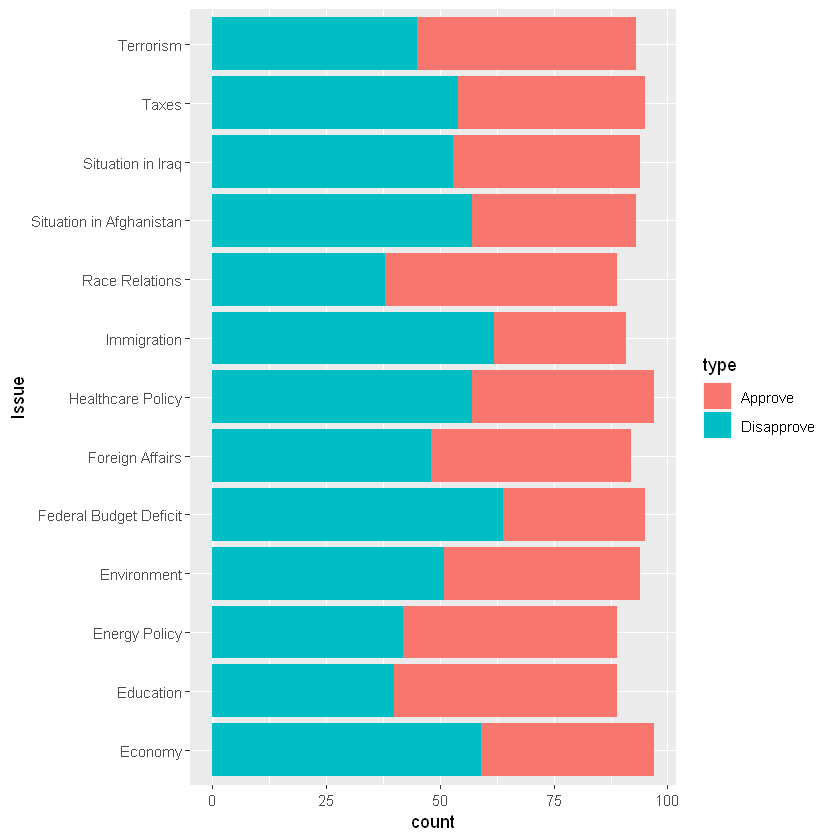

In [24]:
ggplot(df2, aes(x=Issue, y=count, fill=type))+geom_bar(stat="identity")+coord_flip()

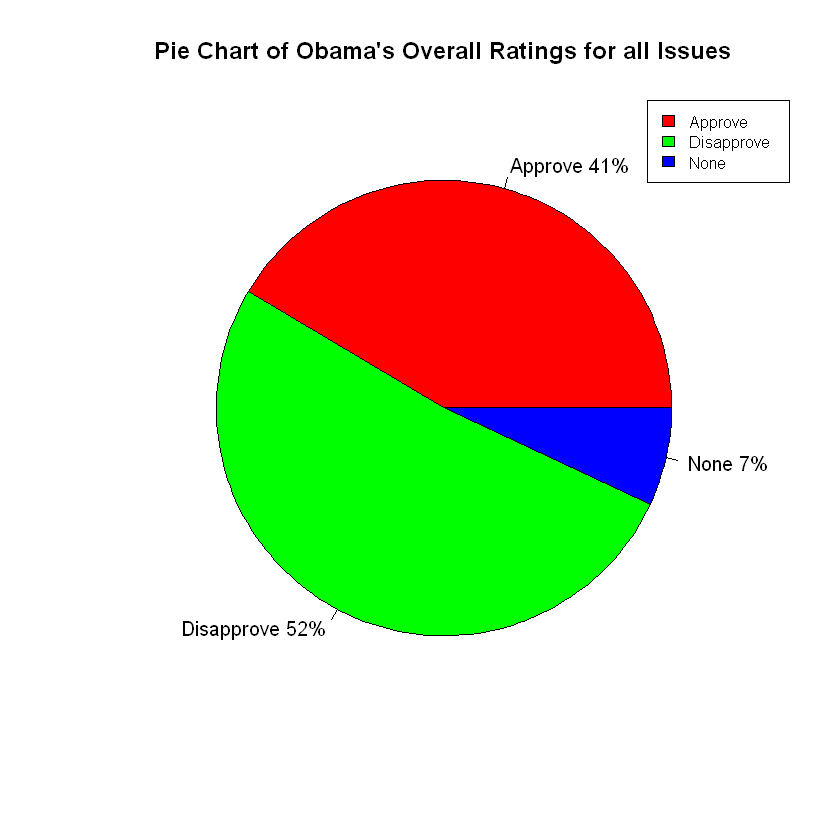

In [33]:
x<-c(539,670,91)
lbls<-c("Approve","Disapprove","None")
pct <- round(x/sum(x)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(x,labels = lbls, col=rainbow(length(lbls)),
   main="Pie Chart of Obama's Overall Ratings for all Issues")
legend("topright", c("Approve","Disapprove","None"), cex = 0.8,
   fill = rainbow(length(x)))

In [45]:
data <- data.frame(
  category=c("Approve","Disapprove","None"),
  count=c(539,670,91))

In [46]:
data$fraction = data$count / sum(data$count)
data$ymax = cumsum(data$fraction)
data$ymin = c(0, head(data$ymax, n=-1))

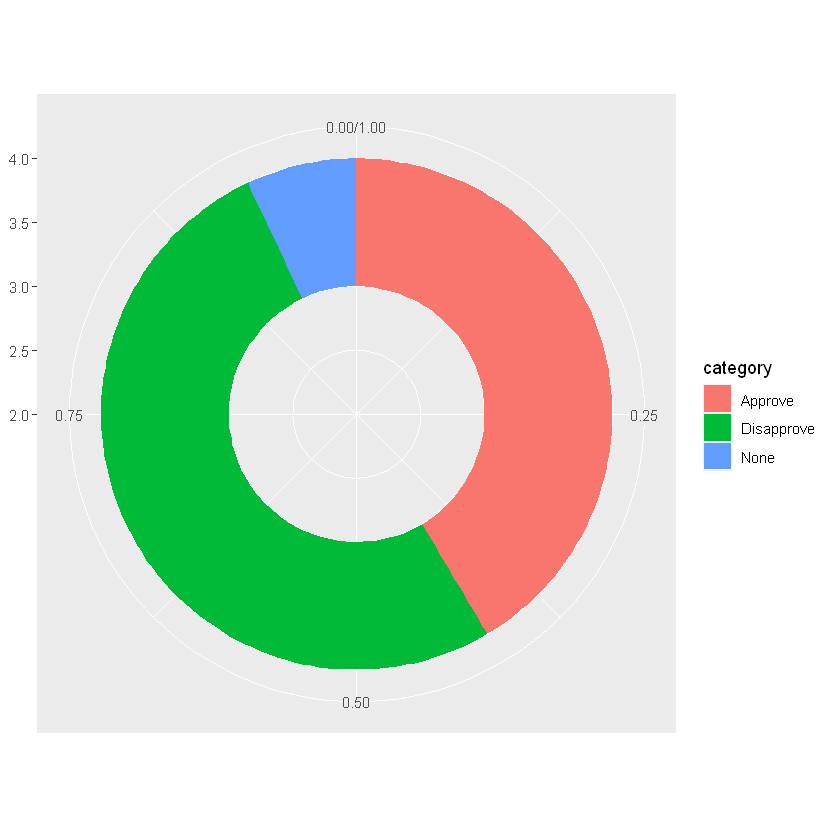

In [47]:
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
     geom_rect() +
     coord_polar(theta="y") + # Try to remove that to understand how the chart is built initially
     xlim(c(2, 4)) # Try to remove that to see how to make a pie chart

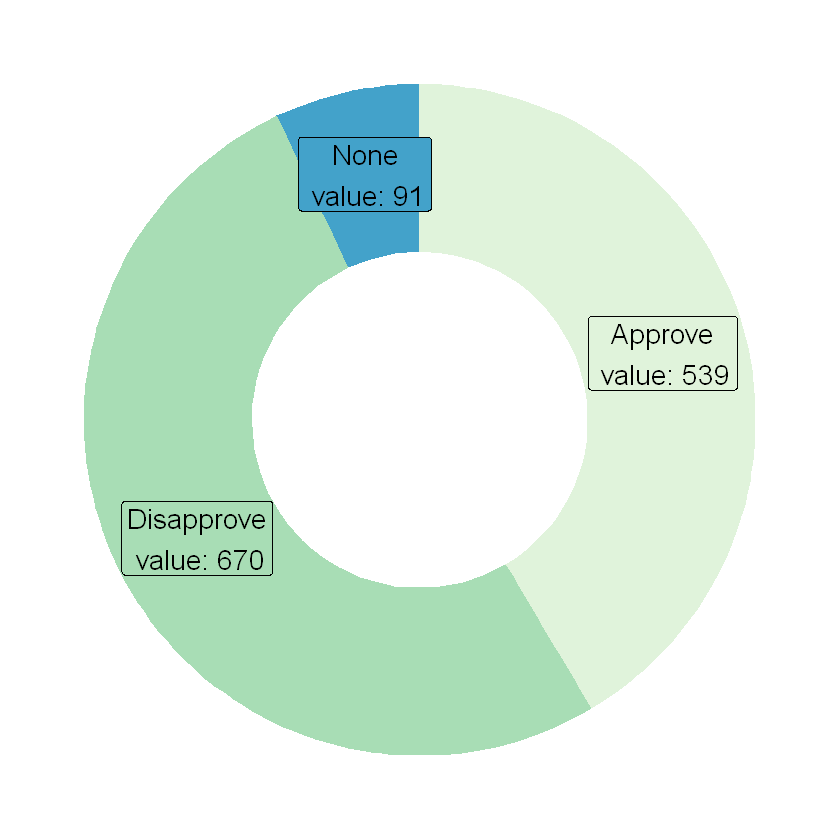

In [48]:
data$labelPosition <- (data$ymax + data$ymin) / 2

# Compute a good label
data$label <- paste0(data$category, "\n value: ", data$count)

# Make the plot
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
  geom_rect() +
  geom_label( x=3.5, aes(y=labelPosition, label=label), size=6) +
  scale_fill_brewer(palette=4) +
  coord_polar(theta="y") +
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "none")